In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# tryig to set the target variable as the fatal or non fatal accindents in France metropolitan area
#Step 2/ Pre-processing and feature engineering : Deadline Friday, 14th of July
#Following the observations made in the previous step, you will have to clean your dataset and perform the pre-processing steps.
#If necessary, you will have to transform and/or add features and enrich your dataset.
#The objective at the end of this step is to have a dataset ready to perform in-depth analysis and/or modeling using Machine (and Deep) Learning.

In [3]:
df = pd.read_csv("./data/230907_basic_table_for_analysis_cleaned.csv", index_col=0, low_memory=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2509596 entries, 201900000001 to 201800057783
Data columns (total 46 columns):
 #   Column        Dtype  
---  ------        -----  
 0   num_veh       object 
 1   place         float64
 2   catu          int64  
 3   grav          int64  
 4   sexe          int64  
 5   an_nais       float64
 6   trajet        float64
 7   locp          float64
 8   actp          object 
 9   etatp         float64
 10  an            int64  
 11  mois          int64  
 12  jour          int64  
 13  hrmn          object 
 14  lum           int64  
 15  agg           int64  
 16  int           int64  
 17  atm           float64
 18  col           float64
 19  adr           object 
 20  lat           float64
 21  long          float64
 22  dep           int64  
 23  metropolitan  float64
 24  catr          float64
 25  circ          float64
 26  nbv           float64
 27  vosp          float64
 28  prof          float64
 29  plan          float64
 30  su

In [4]:
df.head(5)

,num_veh,place,catu,grav,sexe,an_nais,trajet,locp,actp,etatp,...,obs,obsm,choc,manv,date,is_holiday,holiday,secu_used,secu_avail,fatal
Num_Acc,,,,,,,,,,,,,,,,,,,,,
201900000001,B01,2.0,2,4,2,2002.0,0.0,-1.0,-1,-1.0,...,0.0,2.0,5.0,23.0,2019-11-30,False,NaN,3,1,0
201900000001,B01,1.0,1,4,2,1993.0,5.0,-1.0,-1,-1.0,...,0.0,2.0,5.0,23.0,2019-11-30,False,NaN,3,1,0
201900000001,A01,1.0,1,1,1,1959.0,0.0,-1.0,-1,-1.0,...,1.0,0.0,3.0,11.0,2019-11-30,False,NaN,3,1,0
201900000002,A01,1.0,1,4,2,1994.0,0.0,-1.0,-1,-1.0,...,4.0,0.0,1.0,0.0,2019-11-30,False,NaN,3,1,0
201900000003,A01,1.0,1,1,1,1996.0,0.0,-1.0,0,-1.0,...,0.0,2.0,1.0,2.0,2019-11-28,False,NaN,3,1,0


In [8]:
columns_with_missing_values = df.columns[df.isna().any()].tolist()

print("Columns with missing values:", columns_with_missing_values)

Columns with missing values: ['adr', 'lat', 'long', 'holiday']


In [9]:
# cleanning variables that might not be used in the model
df['date']= pd.to_datetime(df.date,format='%Y-%m-%d')
df['year'] = df['date'].dt.year.astype(int)


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['actp'] = le.fit_transform(df['actp'].astype(str))
df['hrmn'] = le.fit_transform(df['hrmn'].astype(str))

In [11]:
# select only teh metropolitan area of France
df_M = df[df['metropolitan'] == 1]
df_M.head(3)

,num_veh,place,catu,grav,sexe,an_nais,trajet,locp,actp,etatp,...,obsm,choc,manv,date,is_holiday,holiday,secu_used,secu_avail,fatal,year
Num_Acc,,,,,,,,,,,,,,,,,,,,,
201900000001,B01,2.0,2,4,2,2002.0,0.0,-1.0,0,-1.0,...,2.0,5.0,23.0,2019-11-30,False,NaN,3,1,0,2019
201900000001,B01,1.0,1,4,2,1993.0,5.0,-1.0,0,-1.0,...,2.0,5.0,23.0,2019-11-30,False,NaN,3,1,0,2019
201900000001,A01,1.0,1,1,1,1959.0,0.0,-1.0,0,-1.0,...,0.0,3.0,11.0,2019-11-30,False,NaN,3,1,0,2019


In [12]:
#cleanning variables that might not be used in the model
df_rf = df_M.drop(['num_veh','adr','date','holiday','lat', 'long','grav'], axis=1) # grav removed because is similat to target 

In [13]:
df_rf.head()

,place,catu,sexe,an_nais,trajet,locp,actp,etatp,an,mois,...,occutc,obs,obsm,choc,manv,is_holiday,secu_used,secu_avail,fatal,year
Num_Acc,,,,,,,,,,,,,,,,,,,,,
201900000001,2.0,2,2,2002.0,0.0,-1.0,0,-1.0,2019,11,...,-1.0,0.0,2.0,5.0,23.0,False,3,1,0,2019
201900000001,1.0,1,2,1993.0,5.0,-1.0,0,-1.0,2019,11,...,-1.0,0.0,2.0,5.0,23.0,False,3,1,0,2019
201900000001,1.0,1,1,1959.0,0.0,-1.0,0,-1.0,2019,11,...,-1.0,1.0,0.0,3.0,11.0,False,3,1,0,2019
201900000002,1.0,1,2,1994.0,0.0,-1.0,0,-1.0,2019,11,...,-1.0,4.0,0.0,1.0,0.0,False,3,1,0,2019
201900000003,1.0,1,1,1996.0,0.0,-1.0,1,-1.0,2019,11,...,-1.0,0.0,2.0,1.0,2.0,False,3,1,0,2019


In [14]:
df_rf['metropolitan'].describe()

count    2421738.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: metropolitan, dtype: float64

In [15]:
# split the data for modeling
# 2005 to 2019 for trainning  and 2020 to 2021 to test

# Filter data for the training period (2005-2018)
train_data = df_rf[(df_rf['an'] >= 2005) & (df_rf['an'] <= 2019)]

# Filter data for the testing period (2019-2021)
test_data = df_rf[(df_rf['an'] >= 2020) & (df_rf['an'] <= 2021)]



In [16]:
# Separate features and target variable
X_train = train_data.drop('fatal', axis=1)  # Features for training
y_train = train_data['fatal']  # Target variable for training

# Separate features and target variable
X_test = test_data.drop('fatal', axis=1)  # Features for training
y_test = test_data['fatal']  # Target variable for training

In [17]:
# modelling the randon forest
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
import joblib

# Save the trained RandomForestRegressor model to a file to avoid run
model_filename = "random_forest_model.pkl"
joblib.dump(rf_model, model_filename)

['random_forest_model.pkl']

In [19]:
#load model previus saved model

from sklearn.ensemble import RandomForestRegressor
import joblib

# Load the saved RandomForestRegressor model from the file
loaded_rf_model = joblib.load("random_forest_model.pkl")

# Now, you can use loaded_rf_model for predictions
y_pred_loaded = loaded_rf_model.predict(X_test)

In [9]:
# make predictions 
y_pred = rf_model.predict(X_test)


NameError: name 'rf_model' is not defined

In [20]:
y_pred = y_pred_loaded # in case need to load and not run the model again
#  calulcate evaluation metrics about the model perfomance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

print( 'MAE =', mae) # lower values indicates better perfomance
print( 'MSE =', mse) # lower values indicates better perfomance
print( 'RMSE =', rmse) # lower values indicates better perfomance
print( 'R2 =', r2) # higher value indicates a better fit 

MAE = 0.05580878694755382
MSE = 0.024321590375784685
RMSE = 0.15595380846835605
R2 = 0.0034856478228472154


test area for the rest of the analysis

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
# Split the original data into a smaller subset (X_subset, y_subset)
X_subset, _, y_subset, _ = train_test_split(X_train, y_train, train_size=10000, random_state=42)

# Define a reduced hyperparameter search space
param_grid = {
    'n_estimators': [50, 100,200],
    'max_depth': [None, 10,20,30],
    'min_samples_split': [2, 5,10],
    'min_samples_leaf': [1, 2,4],
    'max_features': ['auto', 'sqrt','log2']
}

# Reduce the number of iterations
n_iter = 50

# Limit parallelization to reduce memory usage
n_jobs = 2

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Perform hyperparameter tuning
randomized_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=n_iter,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=n_jobs
)

randomized_search.fit(X_subset, y_subset)

# Get the best hyperparameter values
best_params = randomized_search.best_params_


In [24]:
#Train the Model with the Best Hyperparameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, max_features='log2', min_samples_leaf=4,
                      random_state=42)

In [25]:
#(max_depth=10, max_features='sqrt', min_samples_leaf=2,min_samples_split=5, random_state=42)
#(max_features='log2', min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42)
#
y_pred = best_rf_model.predict(X_test)
# Calculate and print evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

print( 'MAE =', mae) # lower values indicates better perfomance
print( 'MSE =', mse) # lower values indicates better perfomance
print( 'RMSE =', rmse) # lower values indicates better perfomance
print( 'R2 =', r2) # higher value indicates a better fit 

MAE = 0.0489141202137694
MSE = 0.021975244413159806
RMSE = 0.1482404951865711
R2 = 0.09962111391706108


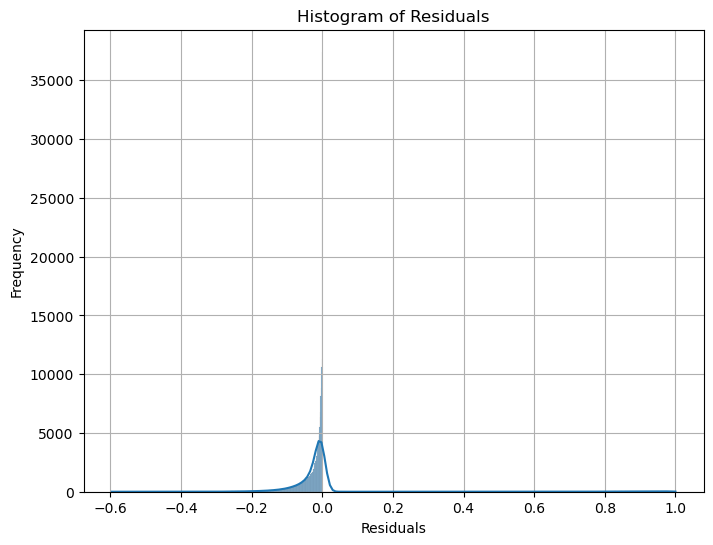

In [26]:
import seaborn as sns
residuals = y_test - y_pred
# Create a histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.grid(True)
plt.show()

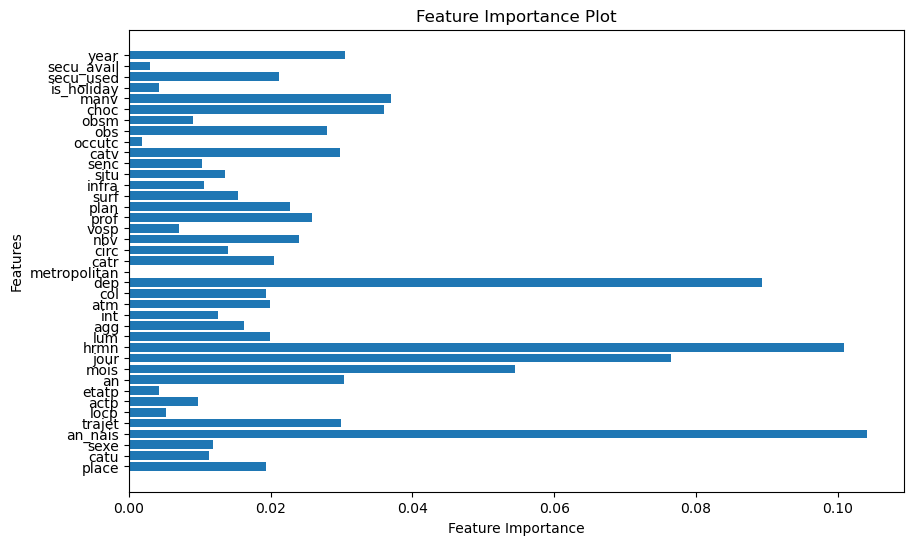

In [22]:
# tryig to find the best features for this model
# Get feature importances from the trained model
feature_importances = loaded_rf_model.feature_importances_

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, tick_label=X_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

In [27]:
#this is taking to long I will run again at night.
# for now just the upper parts are valid for the model 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Create the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Define the extended hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2', 0.2, 0.4]
}

# Increase the number of iterations
n_iter = 50

# Create the randomized search object
randomized_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=n_iter,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=2 ,
    random_state=42
)

# Perform hyperparameter tuning
randomized_search.fit(X_train, y_train)

# Get the best hyperparameter values
best_params = randomized_search.best_params_
